In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

/Users/badalgami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data():
    iris = load_iris()
    data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    data['target'] = iris.target
    return data

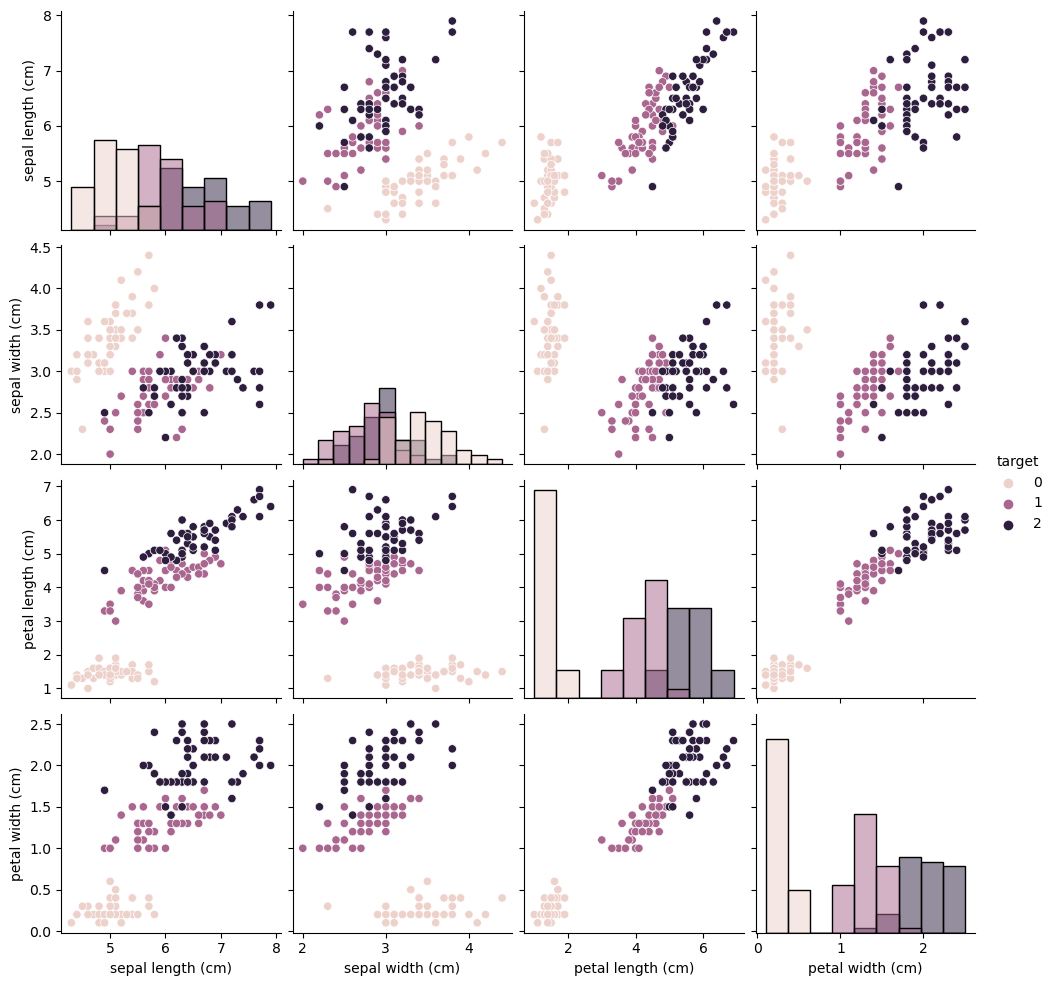

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Plotting
sns.pairplot(data, hue='target', diag_kind='hist')
plt.show()

In [4]:
def preprocess_data(data):
    # Separate features and target variable
    X = data.drop('target', axis=1)
    y = data['target']
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [5]:
def train_model(X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [6]:
def evaluate_model(pipeline, X_test, y_test):
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [7]:
if __name__ == '__main__':
    data = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(data)
    # Model Training
    pipeline = train_model(X_train, y_train)
    #Model Evaluation
    accuracy = evaluate_model(pipeline, X_test, y_test)
    print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9


In [1]:
import joblib

In [10]:
model_file_path = '/Users/badalgami/Desktop/Model_Deployment/trained_model.pkl'
joblib.dump(pipeline, model_file_path)

['/Users/badalgami/Desktop/Model_Deployment/trained_model.pkl']